# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# Load the dataset
data = pd.read_csv("first inten project.csv")

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
len(data)

36285

In [5]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [6]:
# suumery statistics 
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
data.shape

(36285, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# 1. Data Preprocessing

In [9]:
# Check for null values 
print("Null values:\n", data.isnull().sum())

Null values:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [10]:
# Check for data types
print("Data types:\n", data.dtypes)

Data types:
 Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [11]:
# Remove any leading/trailing whitespaces in column names and string data
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
# Handle missing values by filling with median (numeric) or mode (categorical)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [13]:
# Drop irrelevant columns (Booking_ID)
data = data.drop(columns=['Booking_ID'])

In [14]:
# Ensure numeric_cols are defined here
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [15]:
# Convert 'date of reservation' to datetime and split into year, month, and day
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data = data.dropna(subset=['date of reservation'])
data['year'] = data['date of reservation'].dt.year
data['month'] = data['date of reservation'].dt.month
data['day'] = data['date of reservation'].dt.day
data = data.drop(columns=['date of reservation'])

In [16]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


# 2. Transformation for Categorical Data

In [17]:
# Convert categorical columns to numerical values using Label Encoding
le = LabelEncoder()
categorical_cols = ['type of meal', 'room type', 'market segment type']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,Canceled,2018,4,11


In [18]:
# Ensure the target (booking status) is also encoded
data['booking status'] = le.fit_transform(data['booking status'])

# 3. Outlier Detection and Removal using Boxplots and IQR

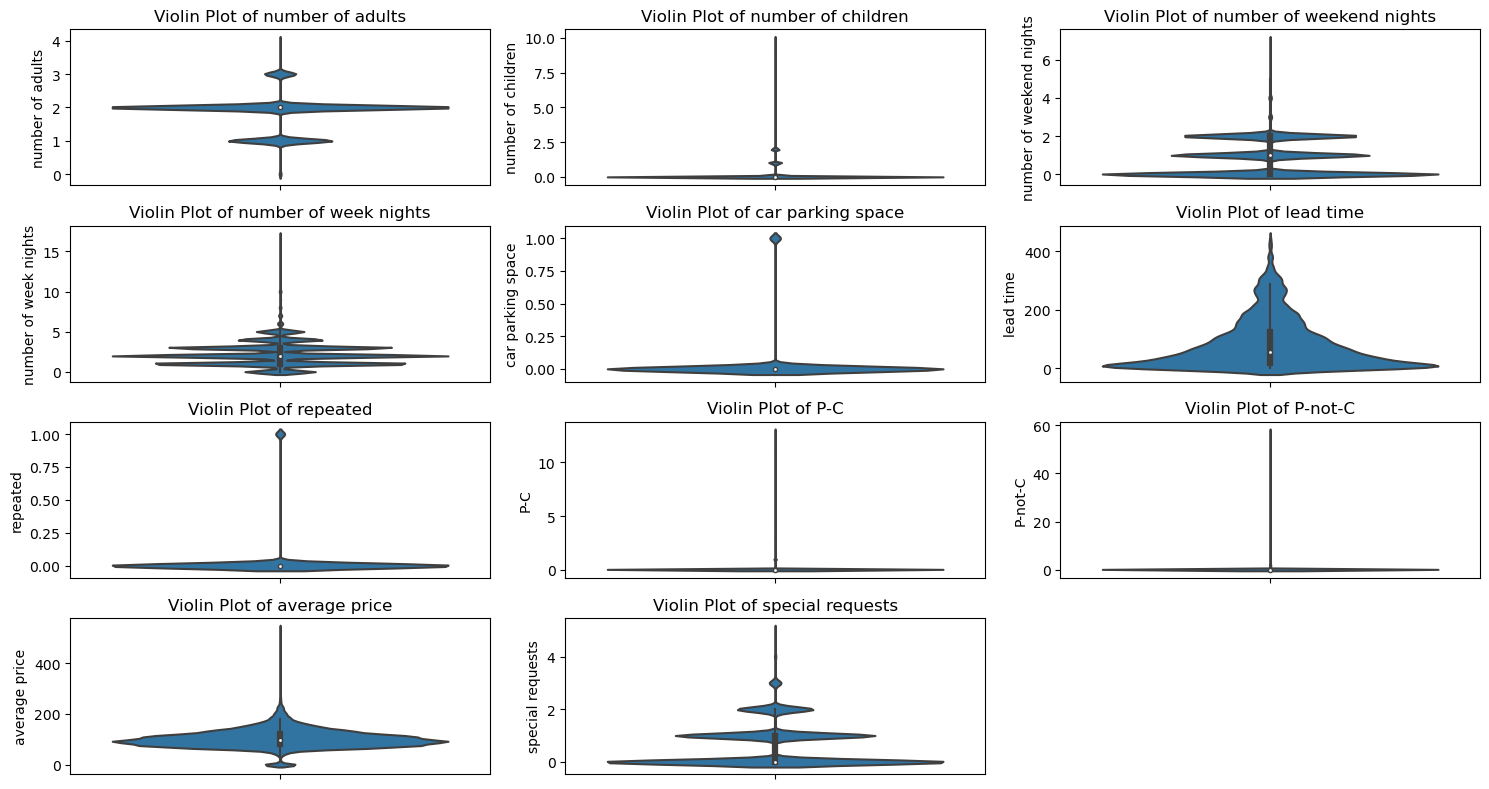

In [19]:
# Violin plot for each numerical column before removing outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust subplot layout
    sns.violinplot(y=data[col])  # Using y argument to specify the column
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout()

plt.show()

In [20]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Remove outliers
data_outlier_removed = data.copy()  # Make a copy of the original data for comparison
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns  # Ensure numeric_cols are defined
for col in numeric_cols:
    data_outlier_removed = remove_outliers_iqr(data_outlier_removed, col)

In [22]:
# After removing outliers, you can print the new shape of the dataset to check if rows were removed
print("New shape of dataset after outlier removal:", data.shape)

New shape of dataset after outlier removal: (36248, 18)


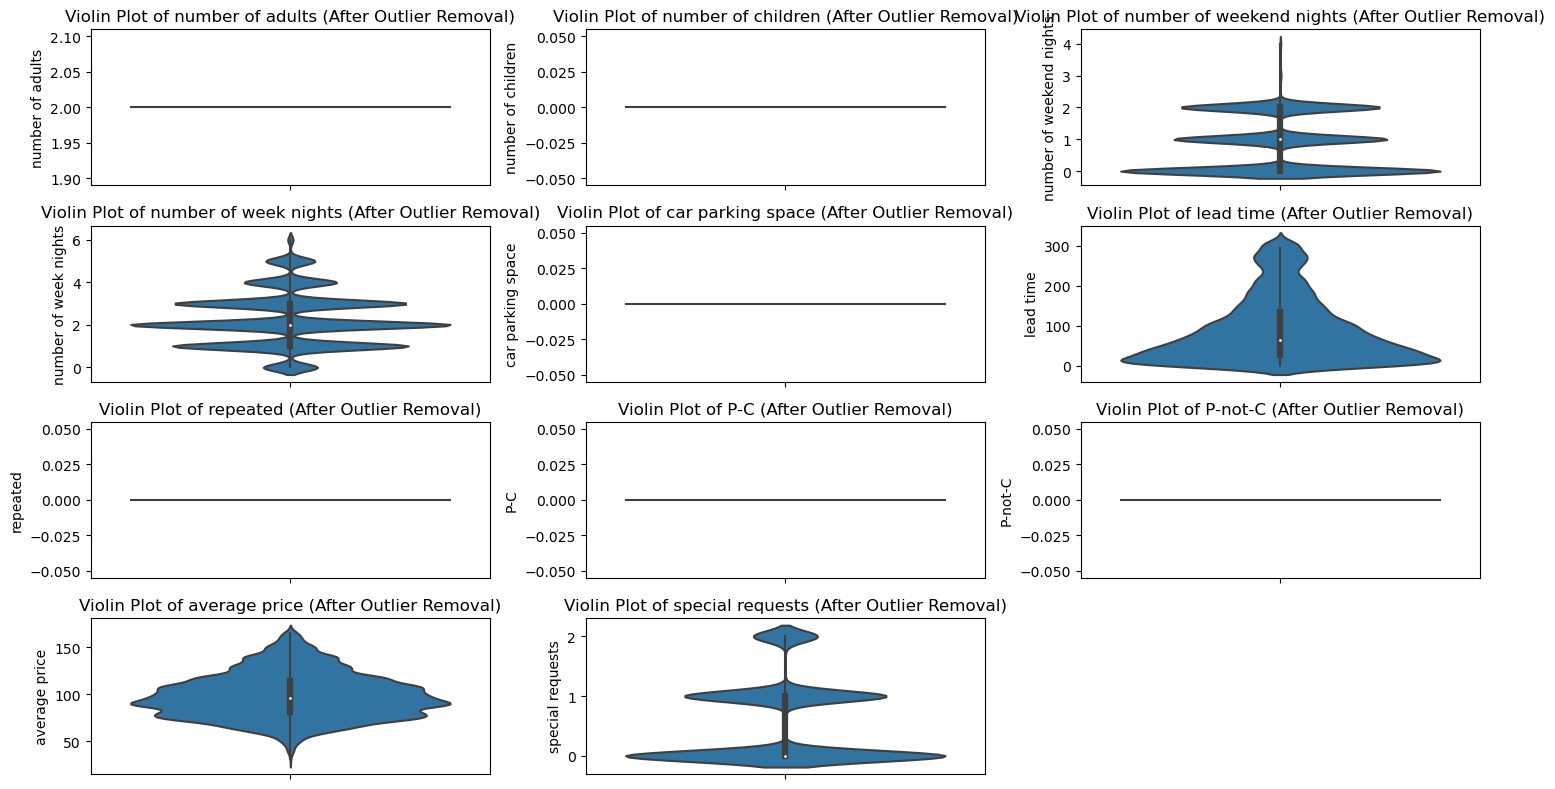

In [23]:
# Violin plot for each numerical column AFTER removing outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # Adjust subplot layout
    sns.violinplot(y=data_outlier_removed[col])  # Using y argument to specify the column
    plt.title(f'Violin Plot of {col} (After Outlier Removal)')
    plt.tight_layout()

plt.show()

In [24]:
# Define a function to remove outliers using Z-score
#def remove_outliers_zscore(df, threshold=3):
    #z_scores = np.abs(stats.zscore(df))
    #return df[(z_scores < threshold).all(axis=1)]  # Keep only rows where all columns have z-scores within the threshold

# Apply Z-score based outlier removal for numeric columns
#numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Use the function to remove outliers from the data
#data[numeric_cols] = remove_outliers_zscore(data[numeric_cols])

#print("New shape of dataset after Z-score outlier removal:", data.shape)


In [25]:
# 4. Train-Validation-Test Split (70%-15%-15%)
X = data.drop(columns=['booking status'])
y = data['booking status']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Feature Normalization using StandardScaler

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 6. Apply PCA (95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Number of components after PCA: {X_train_pca.shape[1]}")

Number of components after PCA: 15


# 7. KNN Classification

In [28]:
# Cross-validation for best k using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31, 2)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             scoring='accuracy')

In [29]:
# Best k from cross-validation
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 3


In [30]:
# Train KNN with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Evaluate on validation set
y_val_pred = knn_best.predict(X_val_pca)
knn_val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"KNN Validation Accuracy: {knn_val_accuracy}")
print("KNN Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("KNN Classification Report:\n", classification_report(y_val, y_val_pred))

KNN Validation Accuracy: 0.8466065845135184
KNN Confusion Matrix:
 [[1336  437]
 [ 397 3267]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1773
           1       0.88      0.89      0.89      3664

    accuracy                           0.85      5437
   macro avg       0.83      0.82      0.82      5437
weighted avg       0.85      0.85      0.85      5437



In [32]:
# Test on test set
y_test_pred = knn_best.predict(X_test_pca)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"KNN Test Accuracy: {knn_test_accuracy}")

KNN Test Accuracy: 0.8414858403824935


# 8. Logistic Regression

In [33]:
# Train logistic regression on PCA data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Evaluate logistic regression on validation set
y_val_pred_log = log_reg.predict(X_val_pca)
log_val_accuracy = accuracy_score(y_val, y_val_pred_log)
print(f"Logistic Regression Validation Accuracy: {log_val_accuracy}")
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_val_pred_log))


Logistic Regression Validation Accuracy: 0.8026485194040831
Logistic Regression Confusion Matrix:
 [[1081  692]
 [ 381 3283]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67      1773
           1       0.83      0.90      0.86      3664

    accuracy                           0.80      5437
   macro avg       0.78      0.75      0.76      5437
weighted avg       0.80      0.80      0.80      5437



In [35]:
# Test logistic regression on test set
y_test_pred_log = log_reg.predict(X_test_pca)
log_test_accuracy = accuracy_score(y_test, y_test_pred_log)
print(f"Logistic Regression Test Accuracy: {log_test_accuracy}")

Logistic Regression Test Accuracy: 0.803052592865024


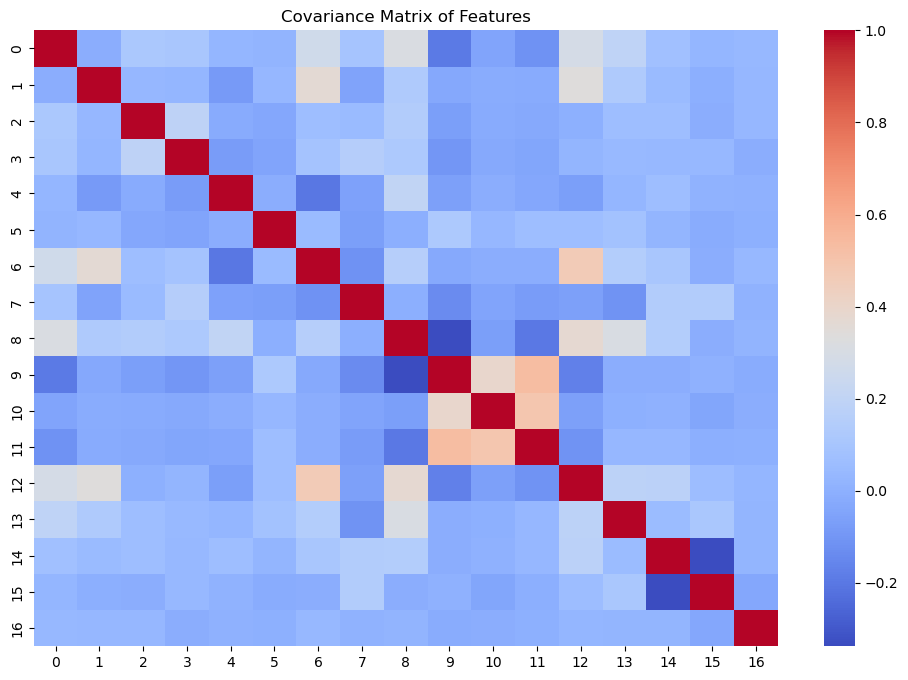

In [36]:
# 9. Covariance Matrix
cov_matrix = np.cov(X_train_scaled.T)
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm')
plt.title('Covariance Matrix of Features')
plt.show()